# The Data

# Introduction

**Description:**
The dataset I decided to look at is called "UFO Sightings" and includes over 80,000 records of UFO sightings around the world.  This dataset includes the UFO's shape, the location of the sighting including the coordinates/country/state, the duration of the sighting, and the time of the sighting.

**Link:**
https://corgis-edu.github.io/corgis/datasets/csv/ufo_sightings/ufo_sightings.csv

**Motivation:**
My motivation for looking at this data is because I have an interest in conspiracy theories and extraterrestial beings and I would like to figure out whether there are patterns behind UFO sightings and what these patterns could mean.

**Questions:**
* Is there a pattern among the most common times and location of UFO sightings?
* Is there a common theme with the locations that have the most common UFO sightings?
* Does the duration of the UFO sighting play an important role?
* Do these patterns imply that these UFO sightings can be credible or debunked?
* How have UFO sightings changed over time?

# Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
import requests
response=requests.get('https://corgis-edu.github.io/corgis/datasets/csv/ufo_sightings/ufo_sightings.csv')
response

<Response [200]>

**Data Summary:**
The dataset includes the shape of the UFO, the location of the sighting (city and state), the duration of the encounter (in seconds), a short description of the sighting, coordinates of the sighting, and the time and date of the sighting (month, day, hour, minute, year), and the date that the sighting was documented. All of the data is numerical except for the description, shape, and location which is categorical.


In [3]:
url='https://corgis-edu.github.io/corgis/datasets/csv/ufo_sightings/ufo_sightings.csv'
df=pd.read_csv(url)
df.head(5)

,Location.City,Location.State,Location.Country,Data.Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25


**Summary Statistics:**



In [4]:
df.describe()

,Data.Encounter duration,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
count,6.063200e+04,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000
mean,5.410128e+03,38.311073,-95.584796,2004.447833,6.872658,15.026587,15.809094,17.718367,2007.401537,6.706063,15.229219
std,4.143867e+05,5.552705,18.025296,10.178389,3.249002,8.920703,7.537834,17.924455,4.480640,3.487636,8.789173
min,1.000000e-02,19.426944,-170.478889,1910.000000,1.000000,1.000000,0.000000,0.000000,1998.000000,1.000000,1.000000
25%,3.000000e+01,34.092222,-114.336667,2002.000000,4.000000,7.000000,11.000000,0.000000,2004.000000,4.000000,8.000000
50%,1.800000e+02,38.904306,-89.911111,2007.000000,7.000000,15.000000,19.000000,15.000000,2008.000000,7.000000,14.000000
75%,6.000000e+02,41.924583,-81.035000,2011.000000,10.000000,22.000000,21.000000,30.000000,2012.000000,10.000000,22.000000
max,6.627600e+07,70.636944,-66.984722,2014.000000,12.000000,31.000000,23.000000,59.000000,2014.000000,12.000000,31.000000


In [5]:
df.shape

(60632, 16)

**Outlier Data:**
There don't seem to be many outliers because the date and time data fit into what the min and max amount of months, years, days, and hours in the day there should be. However, there seems to be an outlier with the max encounter duration which is quite larger than the mean duration and possibly an unrealistic number because 6.627600e+07 seconds is over 600 days.

**Data Preprocessing:**

In [6]:
# check column names
print(df.columns)

Index(['Location.City', 'Location.State', 'Location.Country', 'Data.Shape',
       'Data.Encounter duration', 'Data.Description excerpt',
       'Location.Coordinates.Latitude ', 'Location.Coordinates.Longitude ',
       'Dates.Sighted.Year', 'Dates.Sighted.Month', 'Date.Sighted.Day',
       'Dates.Sighted.Hour', 'Dates.Sighted.Minute', 'Dates.Documented.Year',
       'Dates.Documented.Month', 'Dates.Documented.Day'],
      dtype='object')


In [7]:
# remove outlier durations longer than a day (86400 seconds)
df.drop(df[df['Data.Encounter duration'] >= 86400].index, inplace = True)
df

,Location.City,Location.State,Location.Country,Data.Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60627,sheridan,WY,US,oval,20.0,blue-green bright oval was spotted 20 miles so...,44.797222,-106.955556,2002,9,6,21,0,2002,9,13
60628,thermopolis,WY,US,unknown,15.0,UFO near Thermopolis WY,43.646111,-108.211389,2007,6,14,23,0,2007,8,7
60629,torrington,WY,US,cigar,2.0,I was on a hill enjoying the sunset. I fell as...,42.065000,-104.181111,2011,11,5,21,30,2011,12,12
60630,worland,WY,US,light,15.0,The object was a dim point of light that grew ...,44.016944,-107.954722,2003,6,17,22,42,2003,6,18


In [8]:
# check if the largest encounter durations are less than 86400 seconds
df.nlargest(5, "Data.Encounter duration")

,Location.City,Location.State,Location.Country,Data.Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
345,bessemer,AL,US,unknown,73800.0,10/26/2011 To whom it may concern On or about ...,33.401667,-86.954444,1987,2,20,1,30,2011,12,12
2651,phoenix,AZ,US,light,73800.0,Long Streaks of Light (that put me in mind of ...,33.448333,-112.073333,1998,2,25,3,0,1999,1,28
2921,prescott valley,AZ,US,other,73800.0,3 then up to 6 white flashing lights move erra...,34.610000,-112.315000,2013,10,22,18,30,2013,11,11
9867,san fernando,CA,US,triangle,73800.0,watch many ligth&#39s in the sky day&#39s befo...,34.281944,-118.438056,1998,8,15,17,30,2001,1,3
15522,jacksonville,FL,US,triangle,73800.0,SILENT TRIANGLE SPARKLING LIGHTS INVISBLE CENTER.,30.331944,-81.655833,2010,5,6,20,0,2010,5,12


# Results

### Exploratory Data Visualisations

Text(0.5, 1.0, 'Most Common Hour of UFO Sightings')

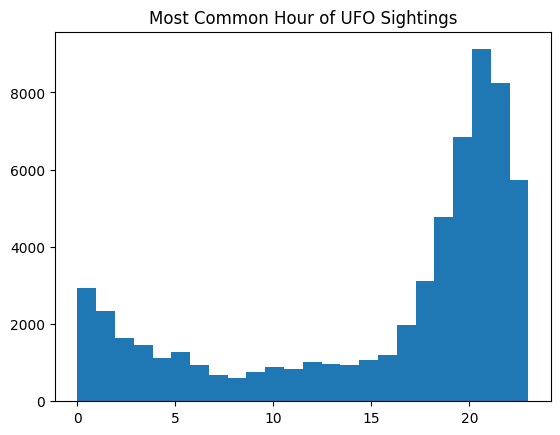

In [9]:
plt.hist(x=df['Dates.Sighted.Hour'], bins=24)
plt.title('Most Common Hour of UFO Sightings')

<Axes: title={'center': 'Scatter Plot of UFO Sighting Coordinates'}, xlabel='Location.Coordinates.Latitude ', ylabel='Location.Coordinates.Longitude '>

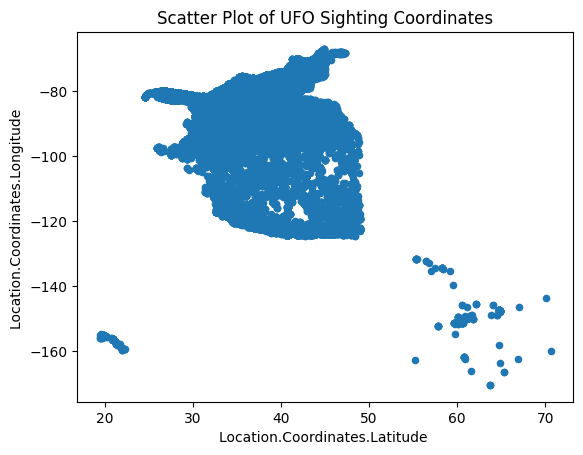

In [10]:
df.plot.scatter(x='Location.Coordinates.Latitude ',y='Location.Coordinates.Longitude ',title='Scatter Plot of UFO Sighting Coordinates')


Text(0.5, 1.0, 'Top 15 Cities with UFO Sightings')

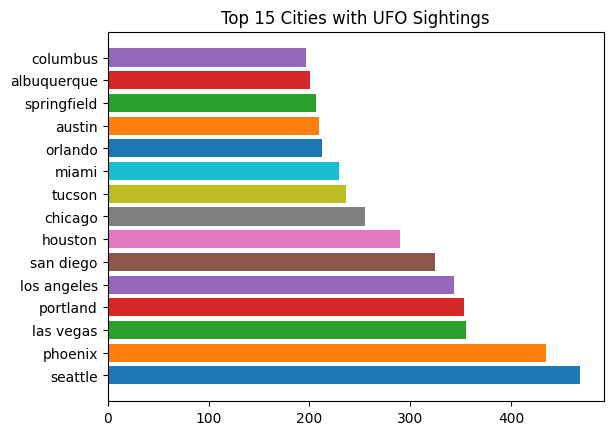

In [11]:
city=df['Location.City']
top15city=nltk.FreqDist(city).most_common(15)
top15city

for x,y in top15city:
    plt.barh(x,y)

plt.title("Top 15 Cities with UFO Sightings")

Text(0.5, 1.0, 'Top 15 UFO Shape Sightings')

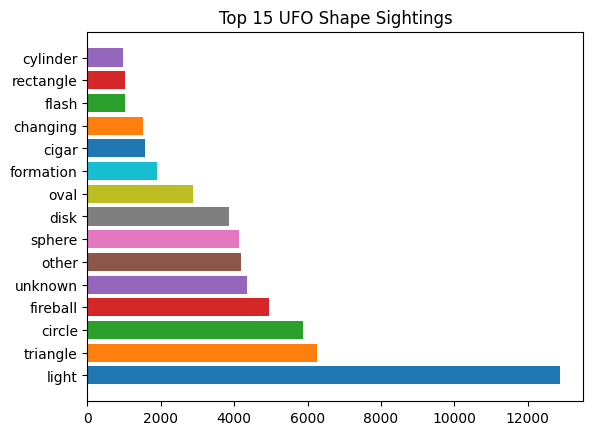

In [12]:
shape=df['Data.Shape']
top15shapes=nltk.FreqDist(shape).most_common(15)
top15shapes

for x,y in top15shapes:
    plt.barh(x,y)

plt.title("Top 15 UFO Shape Sightings")

### Data Visualisations

In [13]:
# Analyze most common UFO shapes in one of the top 5 cities
# Analyze most common UFO shape in one of the cities with less sightings
# See if theres a correlation in UFO sightings over time


Text(0.5, 1.0, 'Common UFO Shapes in Las Vegas')

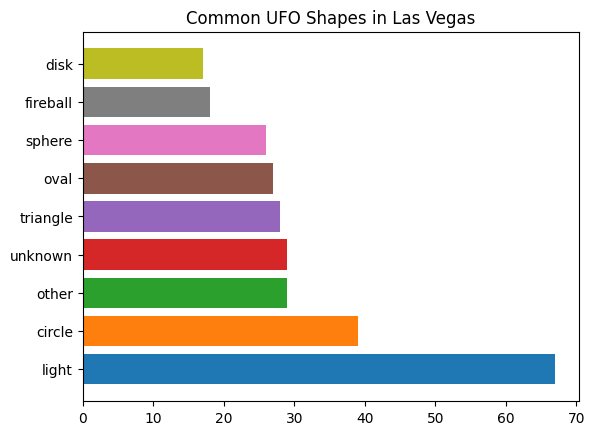

In [14]:
lasvegas = df.loc[df['Location.City'] == "las vegas"]
lasvegasshape=lasvegas['Data.Shape']
lasvegascommonshapes=nltk.FreqDist(lasvegasshape).most_common(9)

for x,y in lasvegascommonshapes:
    plt.barh(x,y)

plt.title("Common UFO Shapes in Las Vegas")


In [15]:
bottom15city = nltk.FreqDist(city).most_common()[-8000:]

Text(0.5, 1.0, 'Common UFO Shapes in Laguna Beach')

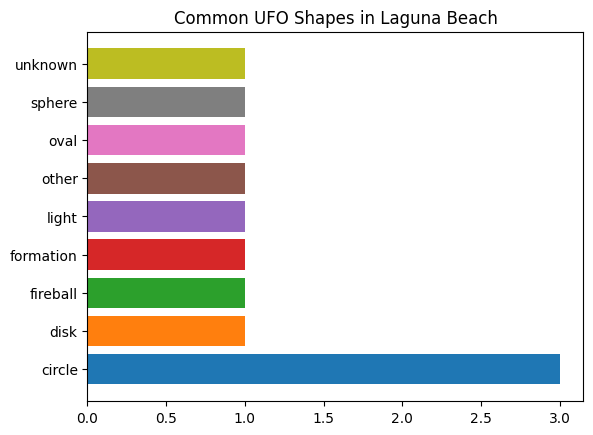

In [16]:

lagunacity = df.loc[df['Location.City'] == "laguna beach"]
lagunashape=lagunacity['Data.Shape']
lagunacommonshapes=nltk.FreqDist(lagunashape).most_common(15)

for x,y in lagunacommonshapes:
    pl1=plt.barh(x,y)

plt.title("Common UFO Shapes in Laguna Beach")


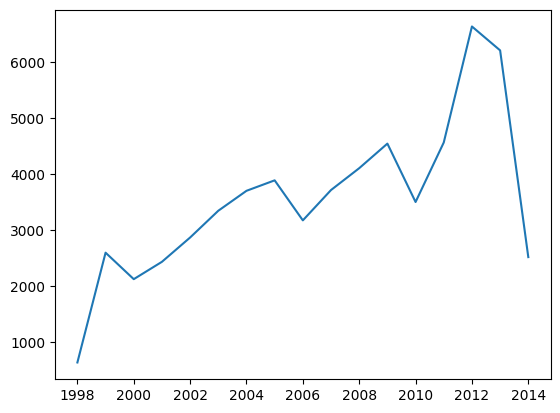

In [17]:
year=df['Dates.Documented.Year']
sightingsperyear=nltk.FreqDist(year)
sightingsperyear

plt.plot(*zip(*sorted(sightingsperyear.items())))

Text(0.5, 1.0, 'Frequency of Encounter Duration of UFO Sightings')

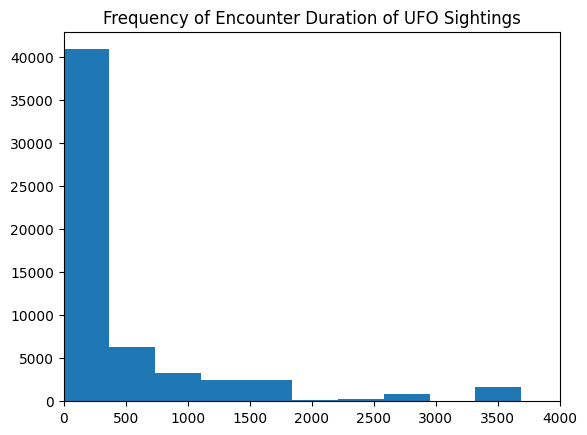

In [18]:
# frequency of UFO encounter durations over the years
plt.hist(x=df['Data.Encounter duration'], bins=200)
plt.xlim([0, 4000])
plt.title('Frequency of Encounter Duration of UFO Sightings')

Text(0.5, 1.0, 'Shape Frequencies over the Years')

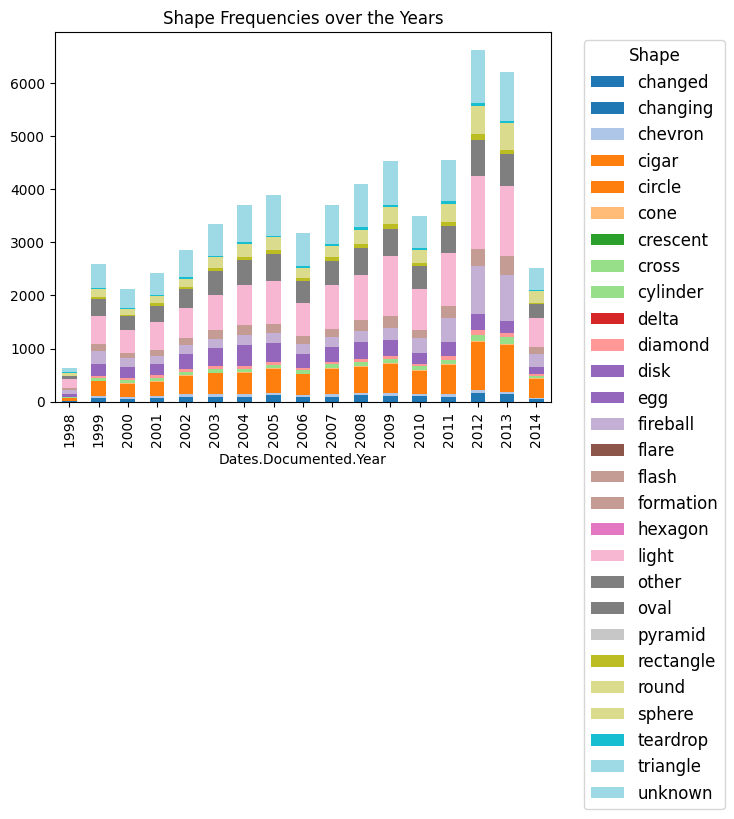

In [19]:
# change in frequency of each UFO shape over time
grouped_data = df.groupby(['Dates.Documented.Year', 'Data.Shape']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, colormap='tab20')
plt.legend(title='Shape', fontsize=12, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Shape Frequencies over the Years')

# Discussion